# Taller 4 
## Luna Gabriela Duran

In [283]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Segmentación Watershed morfológico
Usando OpenCV y Python:

• Realice la segmentación en color de todos los objetos de la imagen 1 usando la máscara
de segmentación generada por el método de Watershed morfológico. Utilice la
umbralización de OTSU y filtros morfológicos para el preprocesamiento de la imagen.


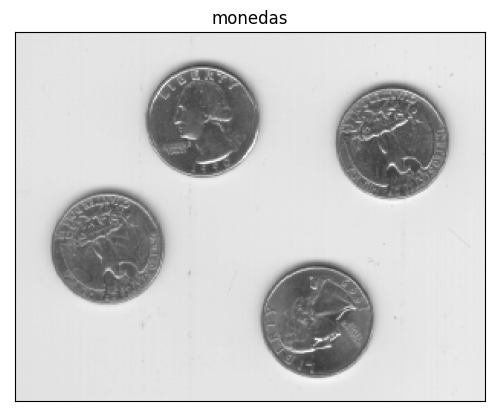

In [284]:
img = cv2.imread('image_1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.title('monedas')
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.show()

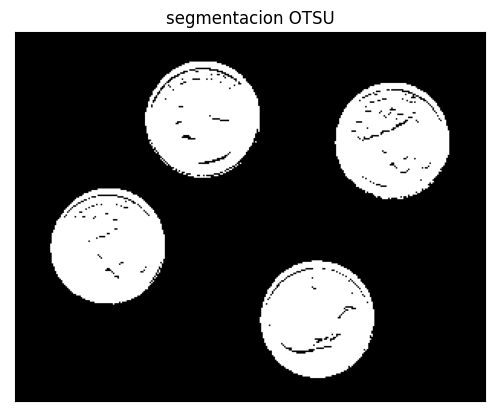

In [285]:
[_, mask] = cv2.threshold(img_gray, 0 ,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) #umbralizacion OTSU

plt.figure()
plt.title('segmentacion OTSU')
plt.imshow(mask, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

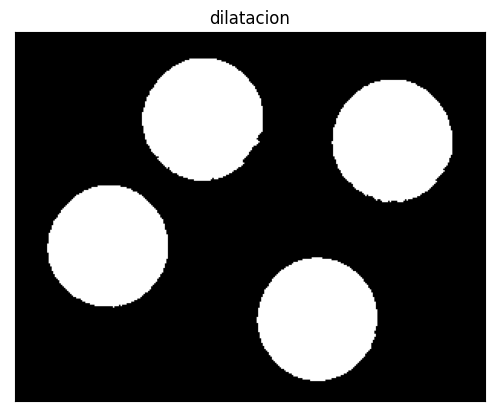

In [286]:
#Remover el ruido de la umbralizacion - estructura los circulos
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#Dilatamos
img_gray_dilate = cv2.dilate(mask, kernel1, iterations= 2)

plt.figure()
plt.title('dilatacion')
plt.imshow(img_gray_dilate, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

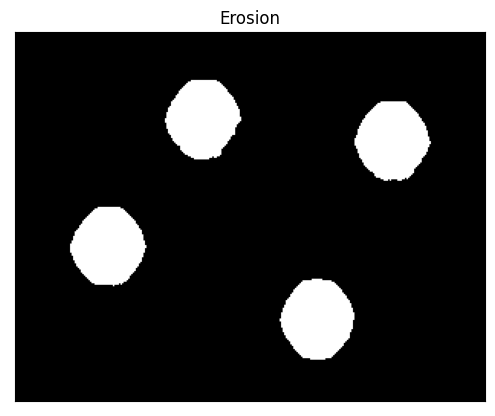

In [287]:
#Remover el ruido de la umbralizacion - estructura los circulos
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#Dilatamos
objects = cv2.erode(img_gray_dilate, kernel2, iterations= 7)

plt.figure()
plt.title('Erosion')
plt.imshow(objects, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

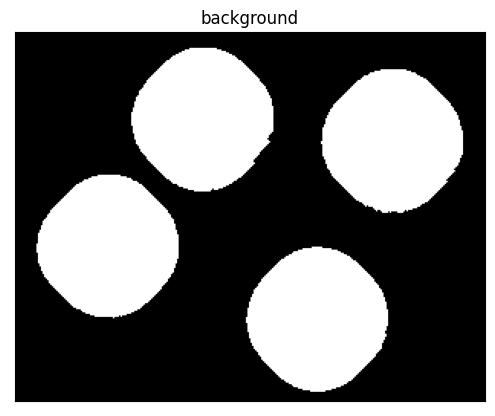

In [288]:
#Detectar el fondo
background = cv2.dilate(img_gray_dilate, kernel1, iterations = 7) #fondo

plt.figure()
plt.title('background')
plt.imshow(background, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


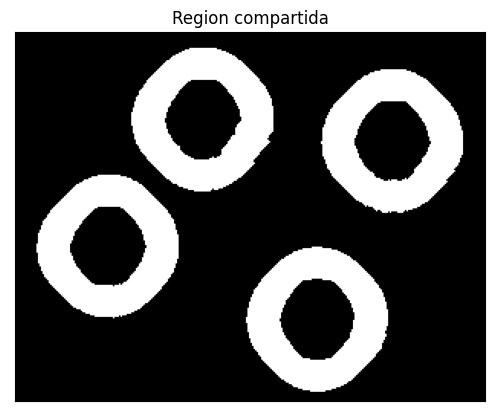

In [289]:
#detectar reegion compartida
unknown = cv2.subtract(background, objects)

plt.figure()
plt.title('Region compartida')
plt.imshow(unknown, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

cantidad de objeto es : 5


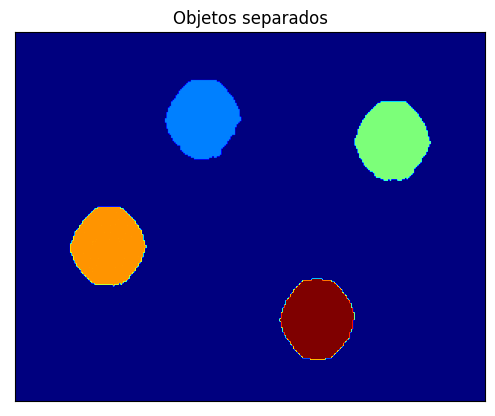

In [290]:
[cnt, makers] = cv2.connectedComponents(objects) #contar objetos o regiones
print('cantidad de objeto es :', cnt)

plt.figure()
plt.title('Objetos separados')
plt.imshow(makers, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

In [291]:
makers = makers +1 #etiquetas desde la 1
makers[unknown == 255] = 0 #region compartida sea 0

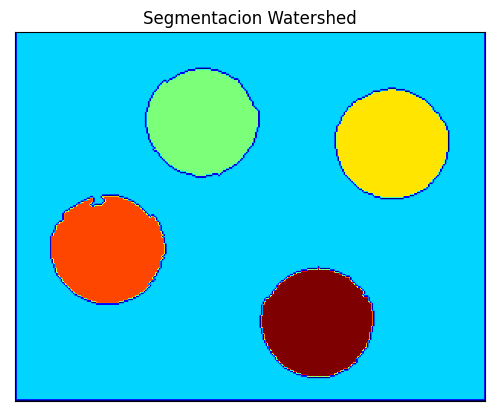

In [292]:
#segmantacion watershed
markers_new = cv2.watershed(img_rgb, makers)
markers_new = markers_new -1

plt.figure()
plt.title('Segmentacion Watershed')
plt.imshow(markers_new, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

• Realice la segmentación en color de solo 2 objetos de la imagen 1 usando la máscara de
segmentación generada por el método de Watershed morfológico.


In [293]:
#Crear máscara de segmentación del objeto 1
mask1 = np.logical_or(np.uint8(markers_new == 1), np.uint8(markers_new == 2))

#Segmentar objeto 1
R, G, B = cv2.split( img_rgb) #dividir canales R, G, B
seg_R = R*mask1
seg_G = G*mask1
seg_B = B*mask1

seg_1 = cv2.merge((seg_R, seg_G, seg_B)) #dividir canales R, G, B


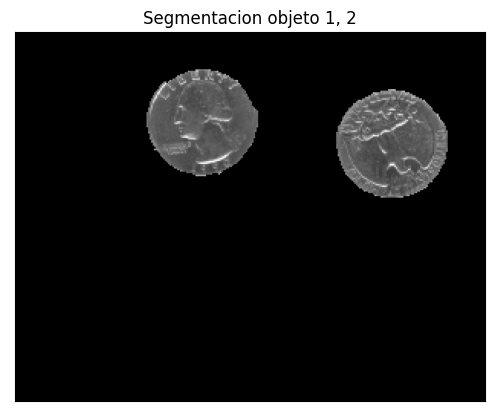

In [294]:
plt.figure()
plt.title('Segmentacion objeto 1, 2')
plt.imshow(seg_1, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


• Realice la segmentación en color de todos los objetos de la imagen 2 usando la máscara
de segmentación generada por el método de Watershed morfológico. Utilice la
umbralización de OTSU y filtros morfológicos para el preprocesamiento de la imagen.


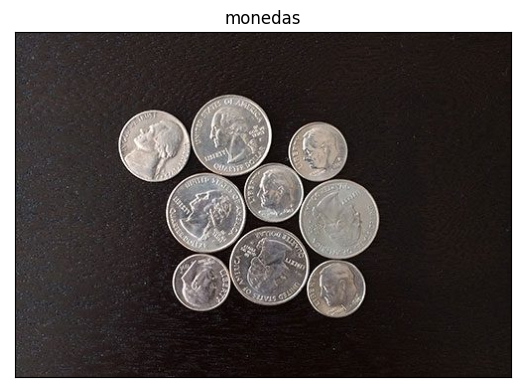

In [295]:
img2 = cv2.imread('image_2.jpg')
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_gray2 =  cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.title('monedas')
plt.imshow(img_rgb2)
plt.xticks([]), plt.yticks([])
plt.show()

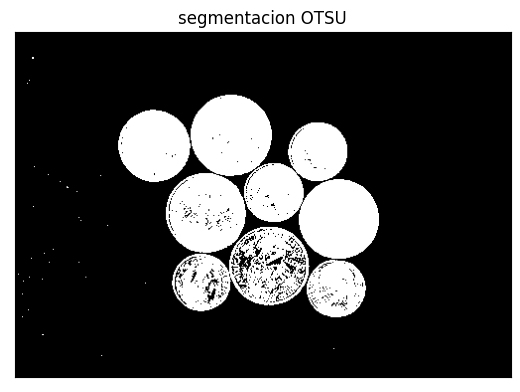

In [296]:
#negativo de la imagen
img_neg = 255 - img_gray2

[_, mask2] = cv2.threshold(img_neg, 0 ,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) #umbralizacion OTSU

plt.figure()
plt.title('segmentacion OTSU')
plt.imshow(mask2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

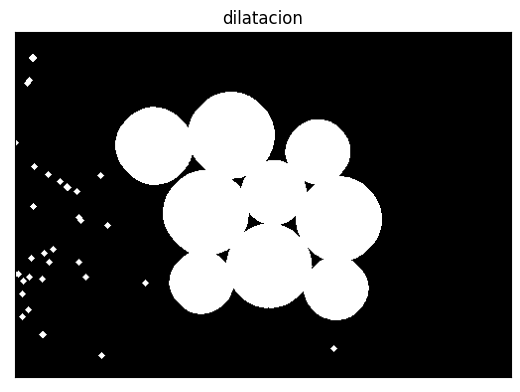

In [297]:
#Remover el ruido de la umbralizacion - estructura los circulos
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#Dilatamos
img_gray_dilate = cv2.dilate(mask2, kernel1, iterations= 3)

plt.figure()
plt.title('dilatacion')
plt.imshow(img_gray_dilate, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

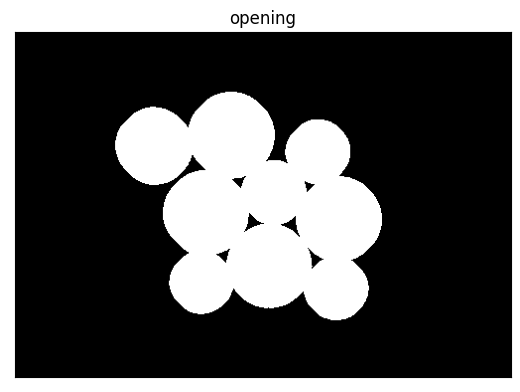

In [298]:

#Remover el ruido de la umbralizacion - estructura los circulos
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#Dilatamos
img_gray_opening = cv2.morphologyEx(img_gray_dilate,cv2.MORPH_OPEN, kernel1, iterations= 8)

plt.figure()
plt.title('opening')
plt.imshow(img_gray_opening, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

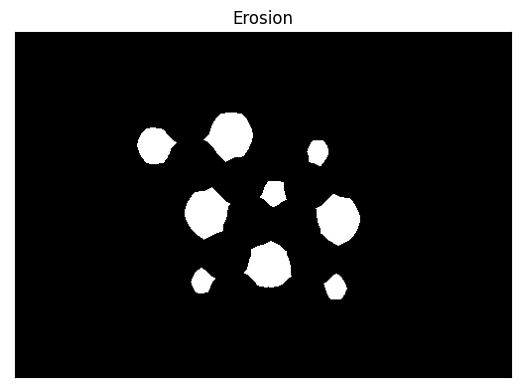

In [299]:
#Remover el ruido de la umbralizacion - estructura los circulos
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
#Dilatamos
objects = cv2.erode(img_gray_opening, kernel2, iterations= 7)

plt.figure()
plt.title('Erosion')
plt.imshow(objects, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

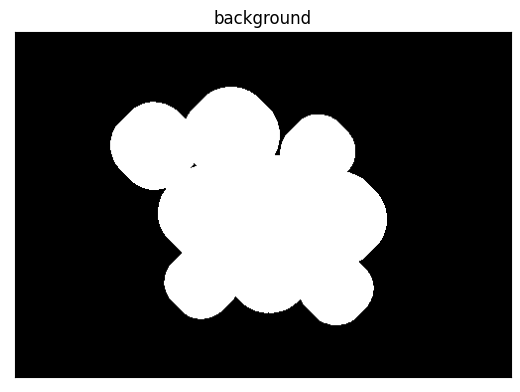

In [300]:
#Detectar el fondo
background = cv2.dilate(img_gray_opening, kernel1, iterations = 5) #fondo

plt.figure()
plt.title('background')
plt.imshow(background, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


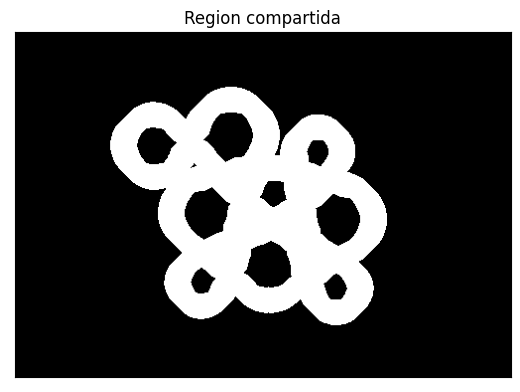

In [301]:
unknown = cv2.subtract(background, objects)

plt.figure()
plt.title('Region compartida')
plt.imshow(unknown, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

cantidad de objeto es : 10


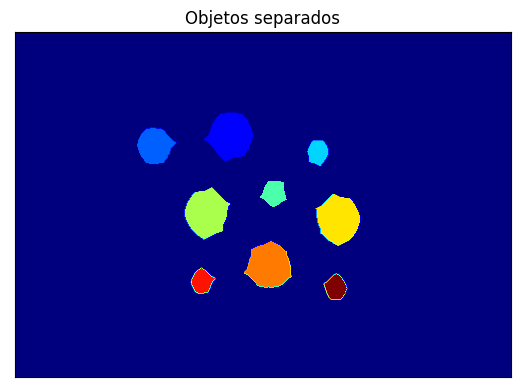

In [302]:
[cnt2, makers2] = cv2.connectedComponents(objects) #contar objetos o regiones
print('cantidad de objeto es :', cnt2)

plt.figure()
plt.title('Objetos separados')
plt.imshow(makers2, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

In [303]:
makers2 = makers2 +1 #etiquetas desde la 1
makers2[unknown == 255] = 0 #region compartida sea 0

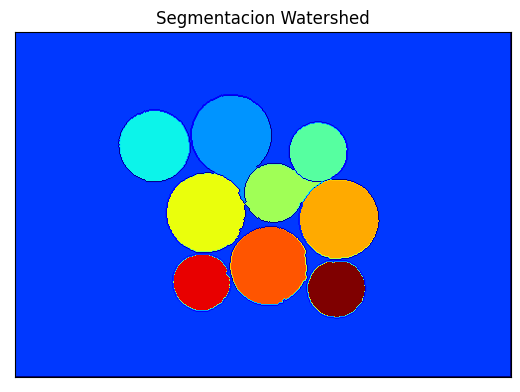

In [304]:
#segmantacion watershed
markers2_new = cv2.watershed(img_rgb2, makers2)
markers2_new = markers2_new -1

plt.figure()
plt.title('Segmentacion Watershed')
plt.imshow(markers2_new, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

• Realice la segmentación en color de solo 4 objetos de la imagen 2 usando la máscara de
segmentación generada por el método de Watershed morfológico.

In [305]:
#Crear máscara de segmentación del objeto 1
mask2 = np.logical_or(np.logical_or(np.uint8(markers2_new == 1) , np.uint8(markers2_new == 3)), 
                np.logical_or(np.uint8(markers2_new == 5) , np.uint8(markers2_new == 7)))

#Segmentar objeto 1
R, G, B = cv2.split( img_rgb2) #dividir canales R, G, B
seg_R2 = R*mask2
seg_G2 = G*mask2
seg_B2 = B*mask2

seg_2 = cv2.merge((seg_R2, seg_G2, seg_B2)) #dividir canales R, G, B


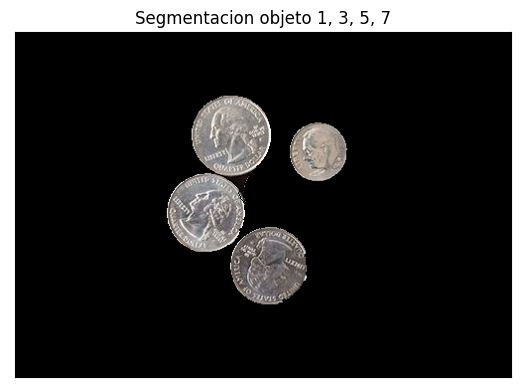

In [306]:
plt.figure()
plt.title('Segmentacion objeto 1, 3, 5, 7')
plt.imshow(seg_2)
plt.xticks([]), plt.yticks([])
plt.show()


2. Evaluación de la segmentación

Usando OpenCV y Python:



In [307]:
!pip install scikit-learn

from sklearn.metrics import jaccard_score

^C


In [310]:
mask_1_man = cv2.imread('image_1_mask.jpg')
mask_2_man = cv2.imread('image_2_mask.jpg')

mask_1_man = cv2.cvtColor( mask_1_man, cv2.COLOR_BGR2GRAY)
mask_2_man = cv2.cvtColor( mask_2_man, cv2.COLOR_BGR2GRAY)

• Realice la evaluación (IoU) de la máscara de segmentación generada por el método de
Watershed morfológico de la imagen 1 utilizando la máscara de segmentación manual
entregada.

In [313]:
mask_new1 = 0
for i in range(1,4):
    mask_new1 += np.uint8(markers_new == i)

[_, mask_1_pro] = cv2.threshold(mask_new1, 0,1, cv2.THRESH_BINARY +cv2.THRESH_OTSU) #umbralizacion OTSU
[_, mask_1_man] = cv2.threshold(mask_1_man, 0,1, cv2.THRESH_BINARY +cv2.THRESH_OTSU) #umbralizacion OTSU

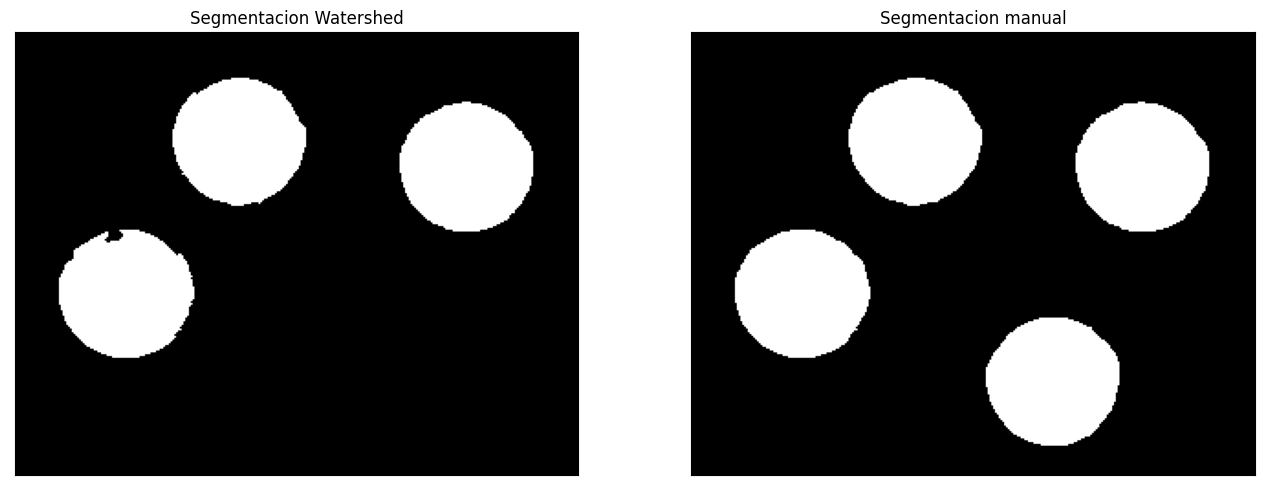

In [355]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('Segmentacion Watershed')
plt.imshow(mask_1_pro, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Segmentacion manual')
plt.imshow(mask_1_man, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

In [314]:
#Hayar indice de Jaccard
J = jaccard_score(mask_1_man , mask_1_pro, average='micro')
print('Indice de Jaccard es:', J)

Indice de Jaccard es: 0.7443402126328955


• Realice la evaluación (IoU) de la máscara de segmentación generada por el método de
Watershed morfológico de la imagen 2 utilizando la máscara de segmentación manual
entregada.

In [315]:
mask_new2 = 0
for i in range(1,9):
    mask_new2 += np.uint8(markers2_new == i)

[_, mask_2_pro] = cv2.threshold(mask_new2, 0,1, cv2.THRESH_BINARY +cv2.THRESH_OTSU) #umbralizacion OTSU
[_, mask_2_man] = cv2.threshold(mask_2_man, 0,1, cv2.THRESH_BINARY +cv2.THRESH_OTSU) #umbralizacion OTSU


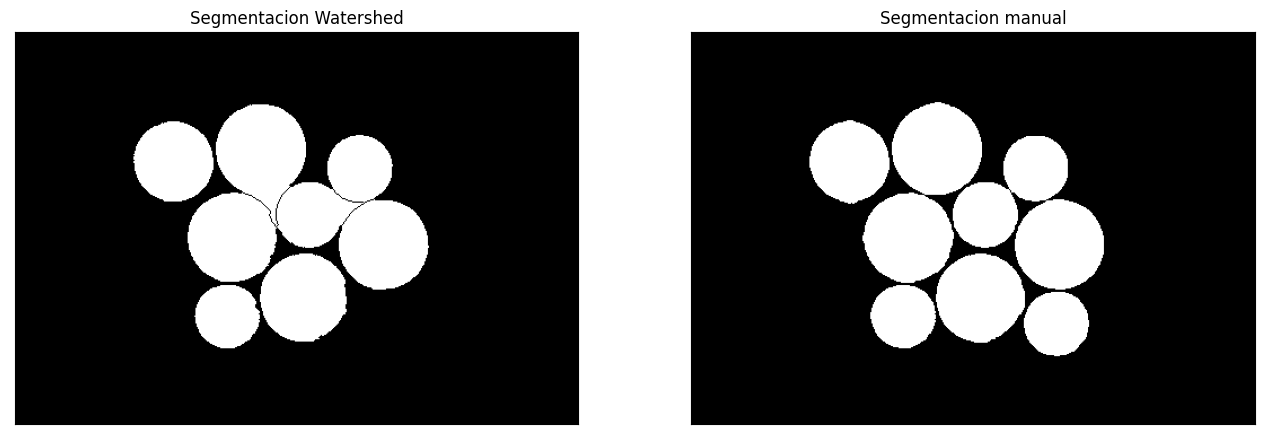

In [354]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('Segmentacion Watershed')
plt.imshow(mask_2_pro, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Segmentacion manual')
plt.imshow(mask_2_man, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

In [316]:
#Hayar indice de Jaccard
J = jaccard_score(mask_2_pro , mask_2_man, average='micro')
print('Indice de Jaccard es:', J)

Indice de Jaccard es: 0.9024327196484476


• Realice la evaluación (IoU) de la máscara de segmentación generada por el método de
umbralización de OTSU de la imagen 1 utilizando la máscara de segmentación manual
entregada.


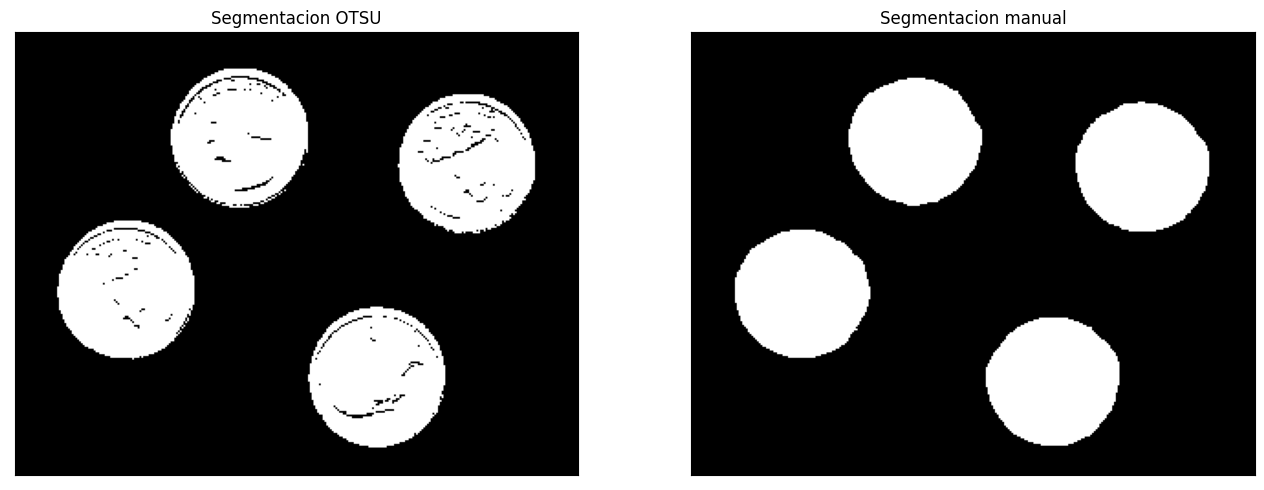

In [353]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('Segmentacion OTSU')
plt.imshow(mask, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Segmentacion manual')
plt.imshow(mask_1_man, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
#Hayar indice de Jaccard
J = jaccard_score(mask , mask_1_man, average='micro')
print('Indice de Jaccard es:', J)

Indice de Jaccard es: 0.8794080961560268


• Realice la evaluación (IoU) de la máscara de segmentación generada por el método de
agrupamiento de k-means (k=2) de la imagen 1 utilizando la máscara de segmentación
manual entregada.

In [346]:
# segmentacion por agupamiento de K-means 
pixel_vals = img.reshape((-1,3)) #reshape imagen a un arreglo 2D de 3 valores
pixel_vals = np.float32(pixel_vals) #convertir a float32

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
#despues de 100 iteraciones o al alcanzar 85% de presicion para

k = 2
val, lab, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers) #convertir a uint8
segmented_data = centers[lab.flatten()]
segmented_image = segmented_data.reshape((img.shape)) #reshape al tamaño original

segmented_image = cv2.cvtColor( segmented_image, cv2.COLOR_BGR2GRAY)
segmented_image = 255 - segmented_image
[_, segmented_image] = cv2.threshold(segmented_image, 0,1, cv2.THRESH_BINARY +cv2.THRESH_OTSU) #umbralizacion OTSU

#codigo inspirado de la implementacion en: https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/

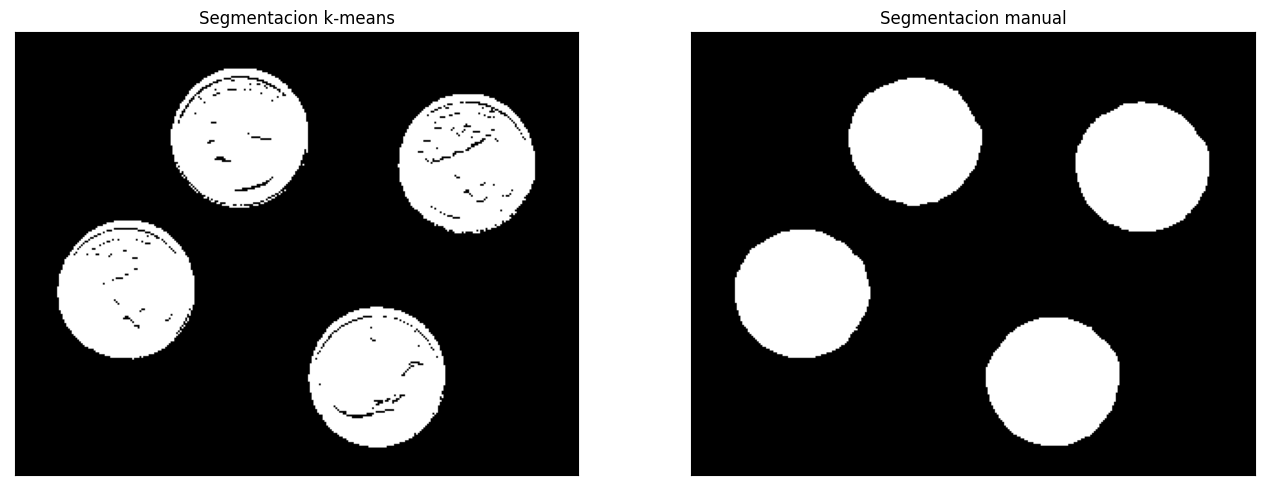

In [352]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('Segmentacion k-means')
plt.imshow(segmented_image, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Segmentacion manual')
plt.imshow(mask_1_man, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

In [350]:
#Hayar indice de Jaccard
J = jaccard_score(segmented_image, mask_1_man , average='micro')
print('Indice de Jaccard es:', J)

Indice de Jaccard es: 0.8794080961560268


## Conclusiones
* Podemos obtener resultados similares en la segmentacion por OTSU que por K-means siendo k=2
* Despues de la segmentación por Watershed de la segunda imagen fue posible hacer la segmentacion de las 9 monedas de la imagen sin embargo dado que algunas monedas estban muy juntas, ademas de las transformaciones morfológicas escogidas algunos objetos no quedaron con la forma circular perfecta 